In [1]:
# !pip install seabon

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [29]:
def f(x):
    return x**3 + x**2 - x - 0.5

def derf(x):
    return 3*x**2 + 2*x - 1

def der2f(x):
    return 6*x +  2

def phi(x):
    try:
        return math.sqrt(x + 0.5 - x**3)
    except:
        return 0

def derphi(x):
    try:
        return (1-3*x*x)/(2 * math.sqrt(x + 0.5 - x**3))
    except:
        return 0

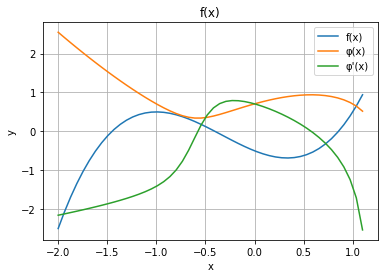

In [30]:
x = np.linspace(-2, 1.1)
plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.plot(x, [f(i) for i in x], label='f(x)')
plt.plot(x, [phi(i) for i in x], label='φ(x)')
plt.plot(x, [derphi(i) for i in x], label="φ'(x)")
plt.legend()

In [31]:
def simpl_iter(x0, eps=0.0001):
    if math.fabs(derphi(x0)) > 1:
        raise Exception(f"Не выполнено условие сходимости метода, phi'({x0}) = {derphi(x0)}")
        
    i = 0
    x = x0
    while math.fabs(f(x)) > eps:
        i+=1
        x = phi(x)
        
    return x, i

def Newton(x0, eps=0.0001):
    if f(x0)*der2f(x0) <= 0:
        raise Exception(f"Не выполнено условие сходимости метода f({x0})*f''({x0}) = {f(x0)*der2f(x0)} < 0")
        
    x = x0
    i = 0
    while math.fabs(f(x)) > eps:
        i += 1
        x = x - f(x)/derf(x)
        
    return x, i

# Метод простых итераций

x_0 = 0.3
eps = 0.001
Найденный корень: 0.8549709093139107
Кол-во итераций: 13


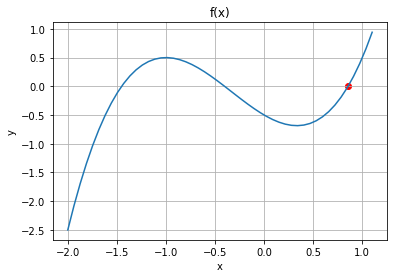

In [39]:
x_begin = float(input('x_0 = '))
eps = float(input('eps = '))
xk, n = simpl_iter(x_begin, eps)
print('Найденный корень:', xk)
print('Кол-во итераций:', n)

plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.plot(x, [f(i) for i in x])
plt.scatter(xk, f(xk), c='red')
None

# Метод Ньютона

x_0 = 1
eps = 0.0000001
Найденный корень: 0.8546376797185686
Кол-во итераций: 4


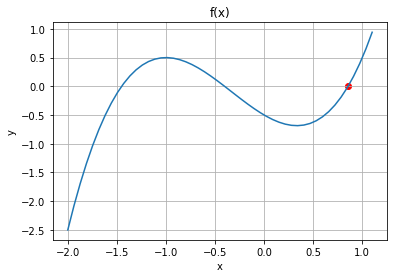

In [42]:
x_begin = float(input('x_0 = '))
eps = float(input('eps = '))
xk, n = Newton(x_begin, eps)
print('Найденный корень:', xk)
print('Кол-во итераций:', n)


plt.title("f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.plot(x, [f(i) for i in x])
plt.scatter(xk, f(xk), c='red')
None

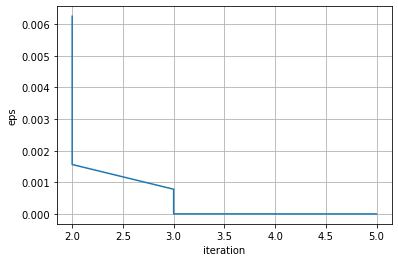

In [72]:
it = []
for eps in [0.1, 0.05, 0.01, 0.005, 0.0005, 0.0001, 0.00005, 0.00001]:
    a, i = simpl_iter(0.3, eps)
    it.append(i)

epsarr = [0.1, 0.05, 0.01, 0.005, 0.0005, 0.0001, 0.00005, 0.00001]
epsarr.reverse()
it.reverse()

it = []
arr = [0.1/(2**i) for i in range(4, 50)]
for eps in arr:
    a, i = Newton(1, eps)
    it.append(i)

epsarr = arr
epsarr.reverse()
it.reverse()

plt.grid(True)
plt.ylabel('eps')
plt.xlabel('iteration')

plt.plot(it, epsarr)

